In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import svm
svm.__all__

['LinearSVC',
 'LinearSVR',
 'NuSVC',
 'NuSVR',
 'OneClassSVM',
 'SVC',
 'SVR',
 'l1_min_c']

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [39]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [32]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [3]:
chouse = pd.DataFrame(data.data, columns=data.feature_names)
chouse

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
chouse_target = pd.DataFrame(data.target, columns=data.target_names)
chouse_target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [50]:
chouse_target.columns

Index(['MedHouseVal'], dtype='object')

In [5]:
avg_price = chouse_target.sum() / chouse_target.__len__()
chouse_target[chouse_target[['MedHouseVal']] < avg_price] = -1
chouse_target[chouse_target[['MedHouseVal']] > avg_price] = 1

In [6]:
chouse_target.value_counts()

MedHouseVal
-1.0           12255
 1.0            8385
dtype: int64

In [7]:
chouse.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


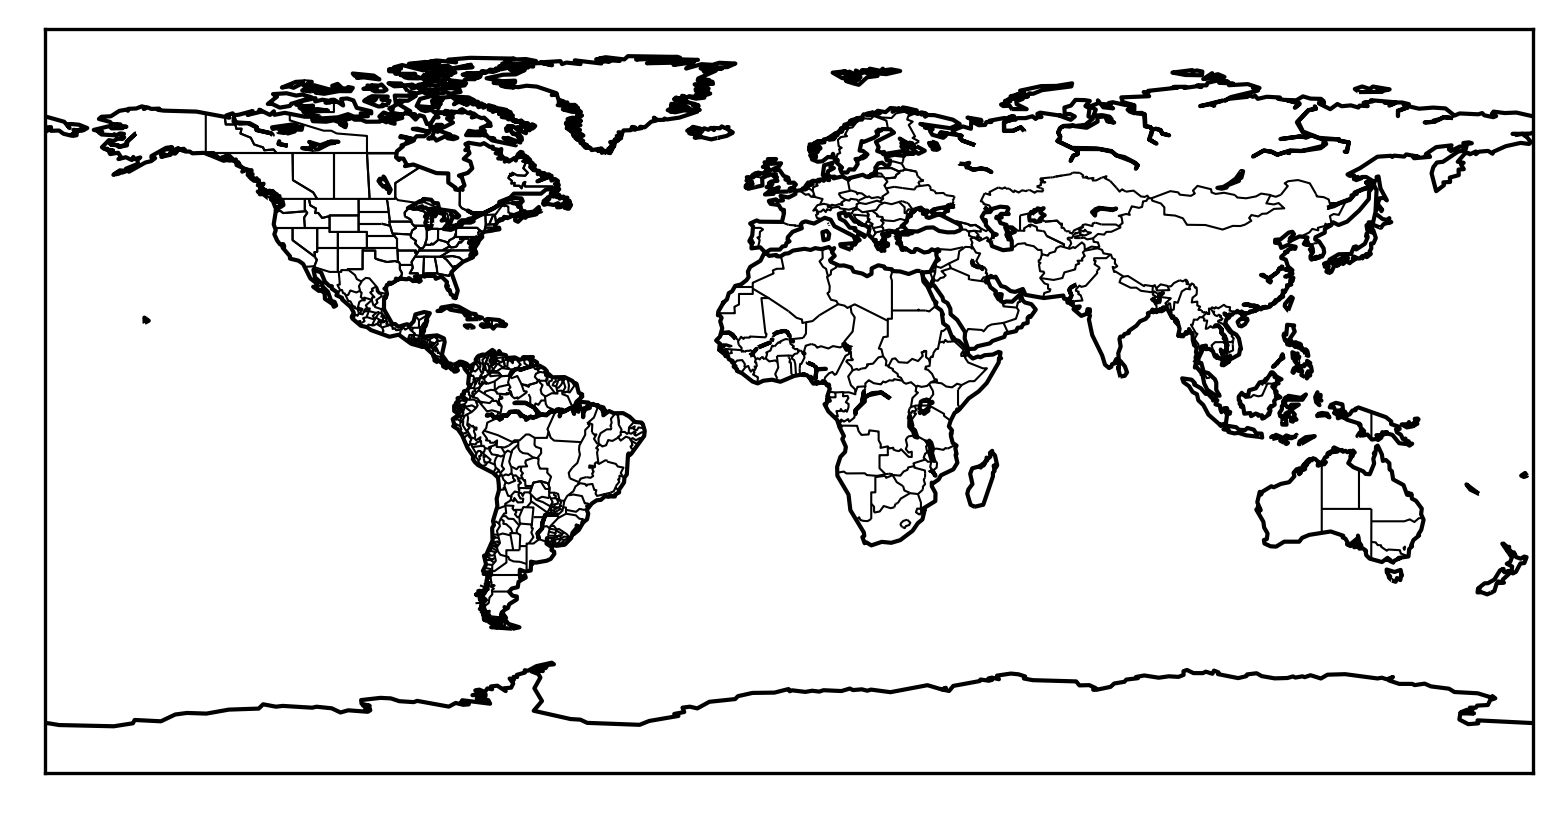

In [10]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
plt.rcdefaults()
plt.rcParams['figure.dpi'] = 300
m = Basemap()
m.drawcoastlines()
m.drawstates()
m.drawcountries()
plt.show()

In [11]:
lon_list = chouse.Longitude
print(lon_list)
print(lon_list.values.flatten())

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: Longitude, Length: 20640, dtype: float64
[-122.23 -122.22 -122.24 ... -121.22 -121.32 -121.24]


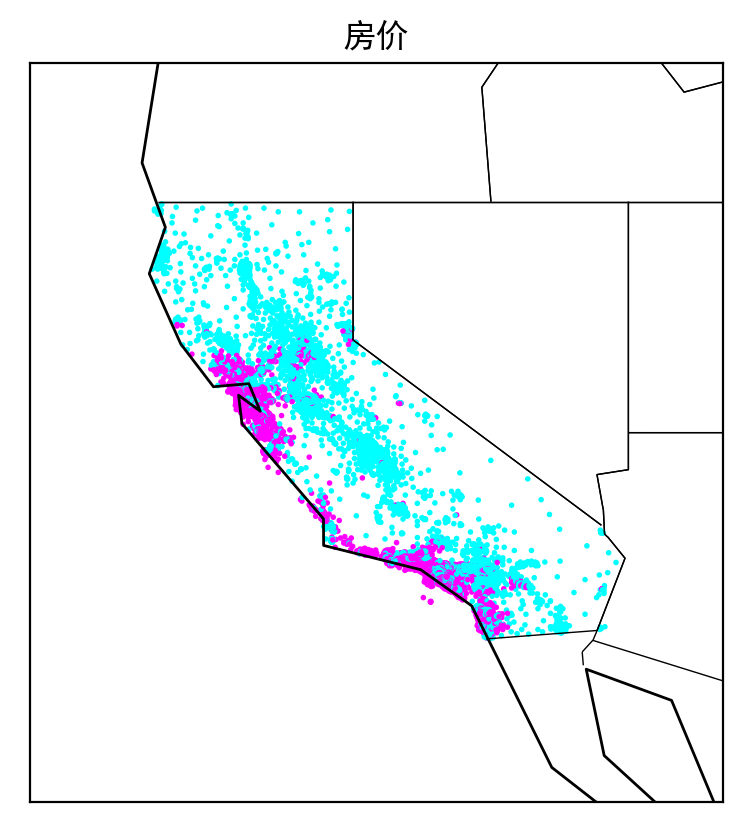

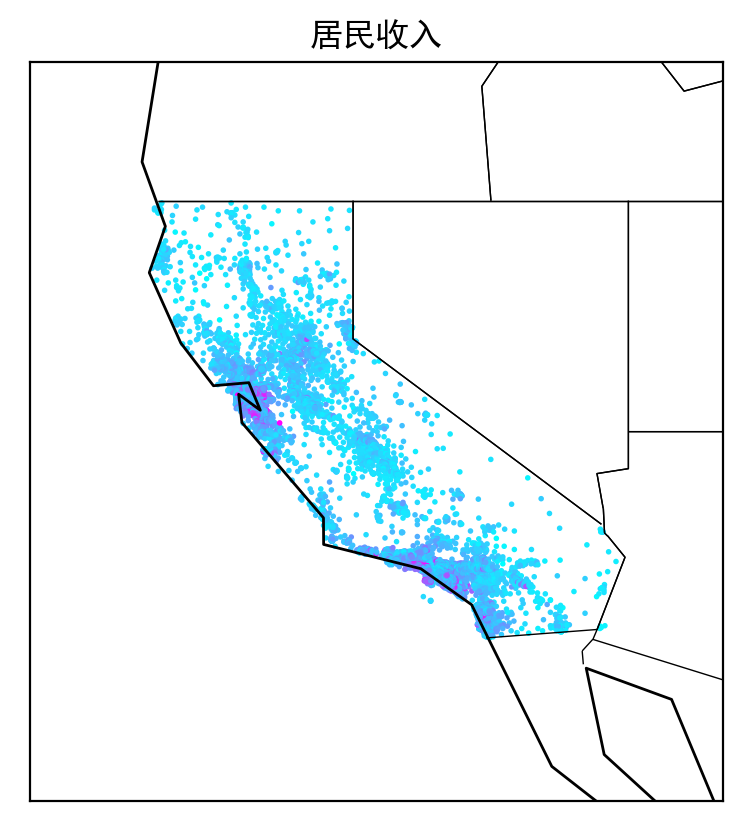

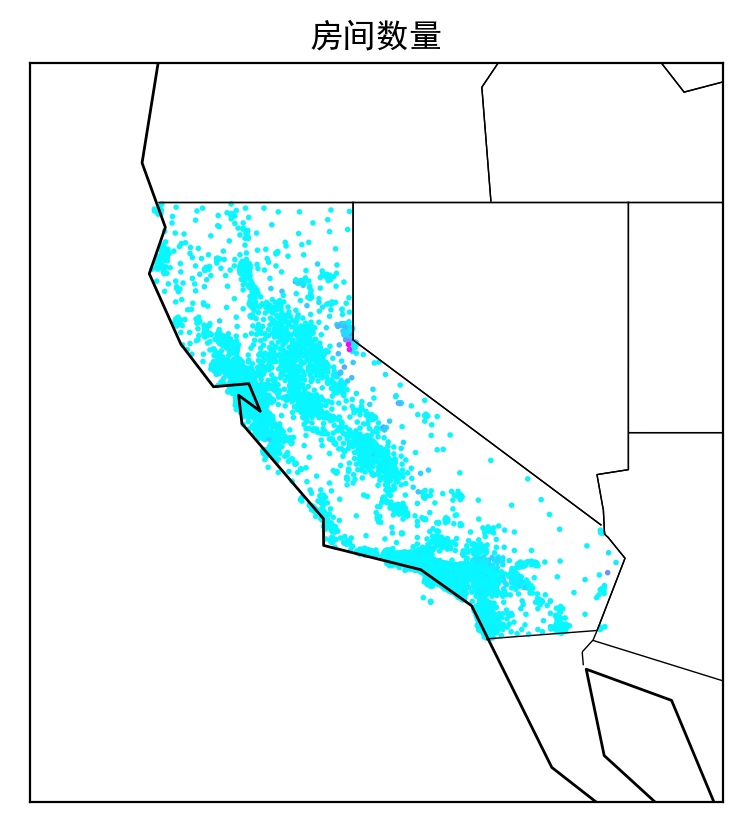

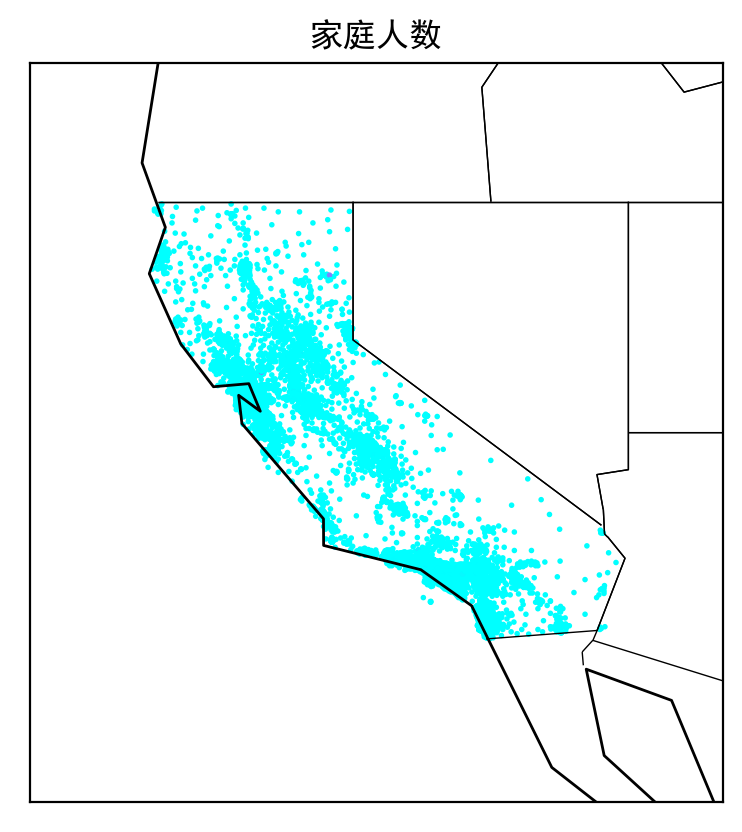

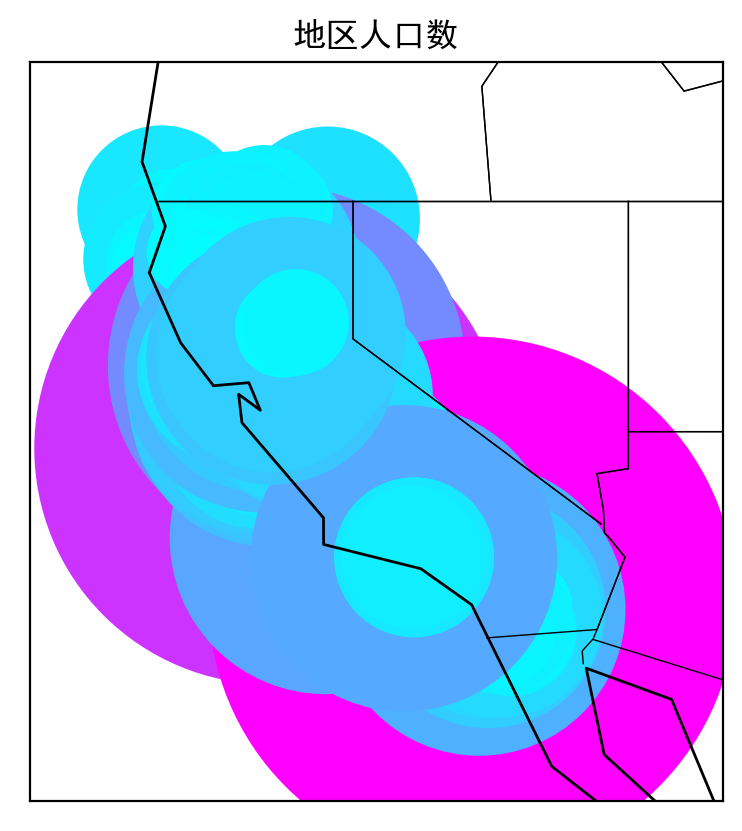

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.sans-serif'] = ['Simhei']
fmap = Basemap(llcrnrlat=32 - 3,
               urcrnrlat=42 + 3,
               llcrnrlon=-124 - 3,
               urcrnrlon=-115 + 3)
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse_target.values.flatten())
plt.title("房价")
plt.show()
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse.MedInc.values.flatten())
plt.title("居民收入")
plt.show()
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse.AveRooms.values.flatten())
plt.title("房间数量")
plt.show()
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
fmap.scatter(lon_list, lat_list, s=1, cmap="cool",
             c=chouse.AveOccup.values.flatten())
plt.title("家庭人数")
plt.show()
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
fmap.scatter(lon_list, lat_list, cmap="cool",
             s=chouse.Population.values.flatten(),
             c=chouse.Population.values.flatten())
plt.title("地区人口数")
plt.show()

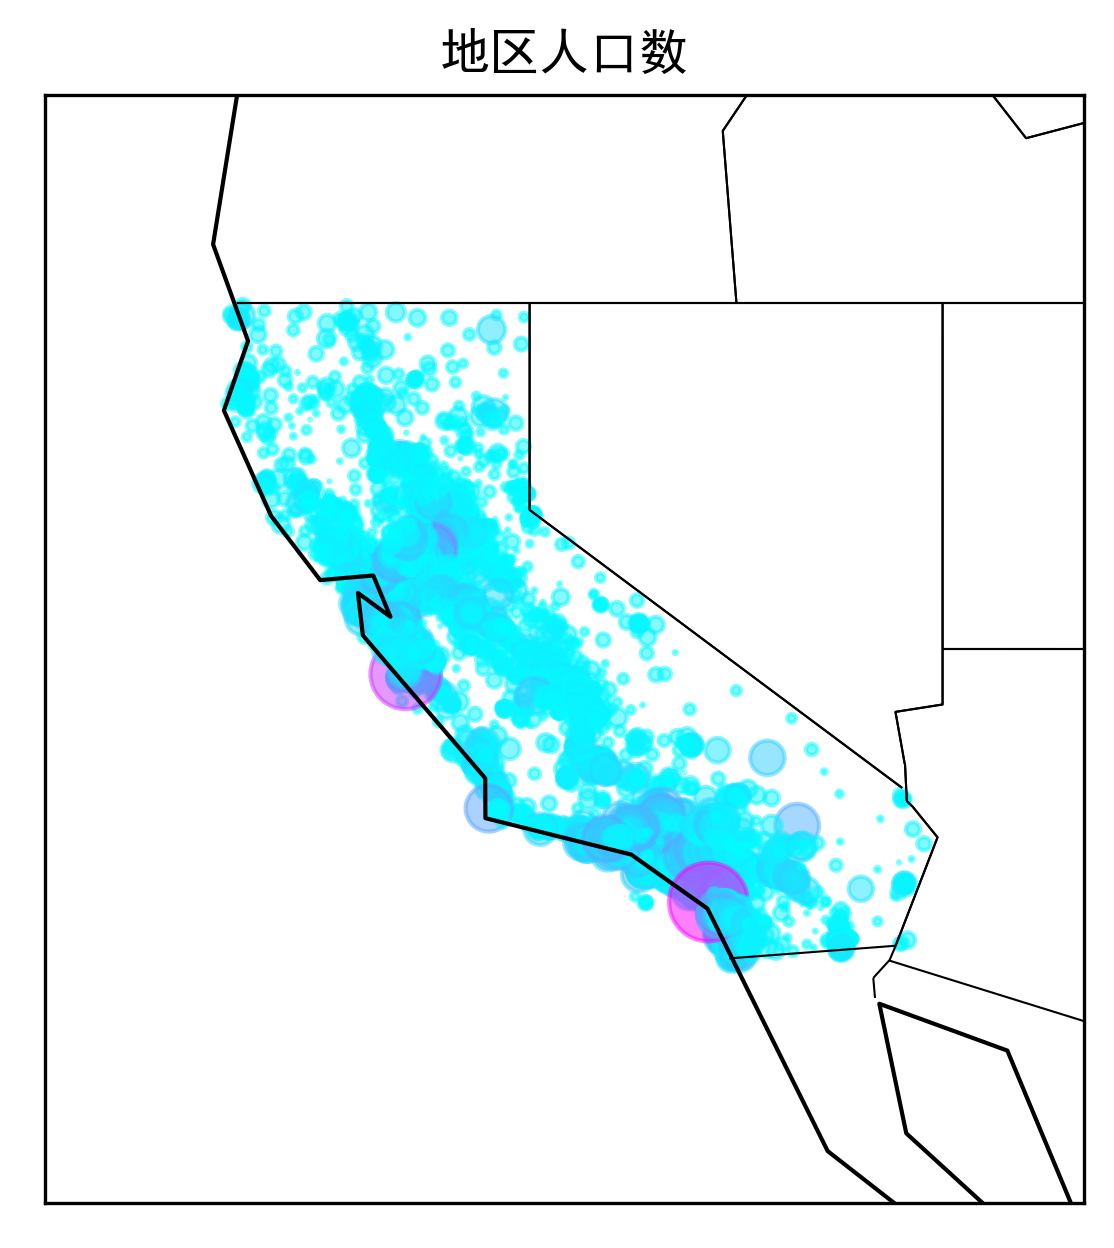

In [16]:
plt.rcParams['figure.dpi'] = 300
fmap.drawcoastlines()
fmap.drawstates()
fmap.drawcountries()
fmap.scatter(lon_list, lat_list, cmap="cool", alpha=0.5,
             s=chouse.Population.values.flatten() / 100,
             c=chouse.Population.values.flatten())
plt.title("地区人口数")
plt.show()

In [18]:
# 使用线性模型
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=234, solver='liblinear', max_iter=10000, C=100)
model.fit(data.data, data.target)
print(model.score(data.data, data.target))

0.8159883720930232


In [20]:
# 使用svm
from sklearn.svm import SVC
model = SVC(C=10.0)
model.fit(data.data, data.target)
print(model.score(data.data, data.target))

0.596172480620155


In [21]:
# 经纬度做变换
lon_list = chouse.Longitude.values.flatten()
lat_list = chouse.Latitude.values.flatten()
lon1 = lon_list.max()
lon2 = lon_list.min()
lat1 = lat_list.min()
lat2 = lat_list.max()
lon1, lon2, lat1, lat2

(-114.31, -124.35, 32.54, 41.95)

In [22]:
from sklearn.metrics import pairwise_distances
pairwise_distances([[0, 0], [1, 1]])

array([[0.        , 1.41421356],
       [1.41421356, 0.        ]])

In [23]:
corner_loc = pd.DataFrame([[lon1, lat1],
                           [lon1, lat2],
                           [lon2, lat1],
                           [lon2, lat2], ], columns=['Longitude', 'Latitude'], index=[20640, 20641, 20642, 20643])
dist_x = pd.concat([chouse[['Longitude', 'Latitude']], corner_loc], axis=0)
dist_x

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20639,-121.24,39.37
20640,-114.31,32.54
20641,-114.31,41.95
20642,-124.35,32.54


In [24]:
dist_x_p = pairwise_distances(dist_x)
dist_x_p

array([[ 0.        ,  0.02236068,  0.03162278, ...,  8.90456624,
         5.74543297,  4.58904129],
       [ 0.02236068,  0.        ,  0.02236068, ...,  8.90484138,
         5.73055844,  4.61139892],
       [ 0.03162278,  0.02236068,  0.        , ...,  8.92720001,
         5.71386034,  4.61108447],
       ...,
       [ 8.90456624,  8.90484138,  8.92720001, ...,  0.        ,
        13.76043967, 10.04      ],
       [ 5.74543297,  5.73055844,  5.71386034, ..., 13.76043967,
         0.        ,  9.41      ],
       [ 4.58904129,  4.61139892,  4.61108447, ..., 10.04      ,
         9.41      ,  0.        ]])

In [71]:
dist_x_p[:-4, -4:]

array([[9.55206784, 8.90456624, 5.74543297, 4.58904129],
       [9.53260195, 8.90484138, 5.73055844, 4.61139892],
       [9.54363662, 8.92720001, 5.71386034, 4.61108447],
       ...,
       [9.75808383, 7.35516825, 7.56762843, 4.01837032],
       [9.82915052, 7.44919459, 7.52681872, 3.94097704],
       [9.73004625, 7.39468052, 7.50473184, 4.04085387]])

In [50]:
x = pd.concat([chouse, pd.DataFrame(dist_x_p[:-4, -4:], columns=['a', 'b', 'c', 'd'])], axis=1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,a,b,c,d
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,9.552068,8.904566,5.745433,4.589041
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,9.532602,8.904841,5.730558,4.611399
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,9.543637,8.927200,5.713860,4.611084
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,9.551947,8.936084,5.710175,4.606517
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,9.551947,8.936084,5.710175,4.606517
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,9.702165,7.215906,7.667542,4.090049
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,9.793493,7.325408,7.626408,3.988885
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,9.758084,7.355168,7.567628,4.018370
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,9.829151,7.449195,7.526819,3.940977


In [75]:
# 使用线性模型
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=234, solver='liblinear', max_iter=10000, C=100)
model.fit(x, chouse_target)
print(model.score(x, chouse_target))

0.8424903100775194


C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
# 使用svm
from sklearn.svm import SVC
model = SVC(C=10.0)
model.fit(x, chouse_target)
print(model.score(x, chouse_target))

C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5962693798449612


In [51]:
# x归一化
x = (x-x.min())/(x.max()-x.min())
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,a,b,c,d
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.691858,0.717391,0.240812,0.336291
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.690394,0.717454,0.238270,0.337974
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.691223,0.722574,0.235416,0.337950
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.691849,0.724609,0.234787,0.337607
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.691849,0.724609,0.234787,0.337607
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.703147,0.330643,0.569280,0.298736
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.710017,0.355722,0.562251,0.291122
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.707353,0.362538,0.552206,0.293341
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.712699,0.384072,0.545232,0.287516


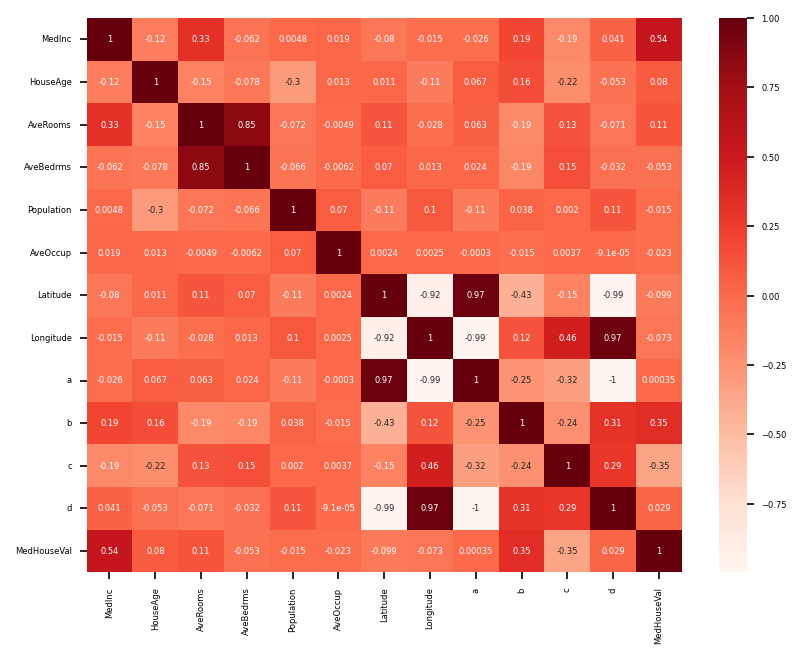

In [52]:
import seaborn as sns
plt.rcdefaults()
plt.rcParams['figure.dpi']=150
plt.rcParams['font.size'] = 4
sns.heatmap(pd.concat([x, chouse_target], axis=1).corr(),
            cmap='Reds',
            annot=True)
plt.show()

In [56]:
x_2 = x[['MedInc','b']]
x_2

,MedInc,b
0,0.539668,0.717391
1,0.538027,0.717454
2,0.466028,0.722574
3,0.354699,0.724609
4,0.230776,0.724609
...,...,...
20635,0.073130,0.330643
20636,0.141853,0.355722
20637,0.082764,0.362538
20638,0.094295,0.384072


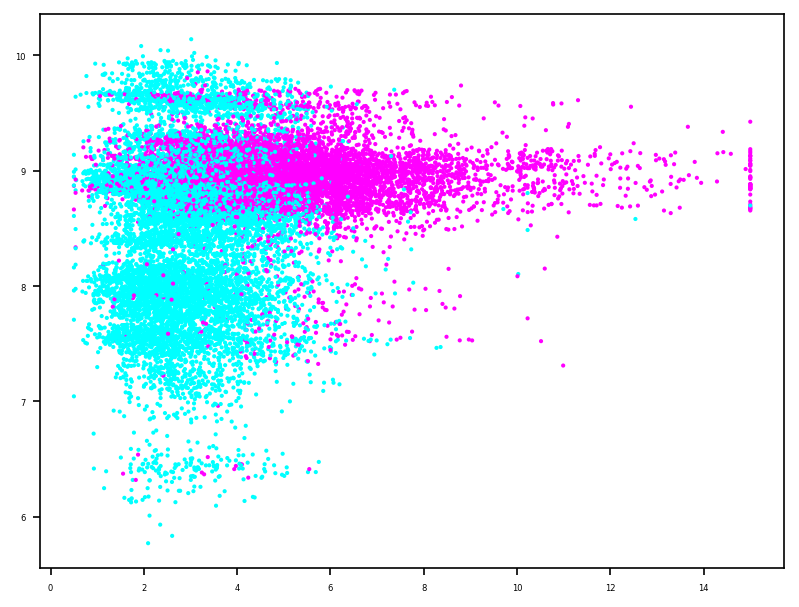

In [53]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(x_2[['MedInc']], x_2[['b']], c=chouse_target.values.flatten(), cmap='cool', s=1)
plt.show()

In [54]:
# 准备数据
scale = 100
disp_x = np.linspace(0, 1, scale + 1)
disp_y = np.linspace(0, 1, scale + 1)
disp_x, disp_y = np.meshgrid(disp_x, disp_y)
disp_input = np.vstack((disp_x.flatten(), disp_y.flatten())).T
disp_input

array([[0.  , 0.  ],
       [0.01, 0.  ],
       [0.02, 0.  ],
       ...,
       [0.98, 1.  ],
       [0.99, 1.  ],
       [1.  , 1.  ]])

C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7834302325581395


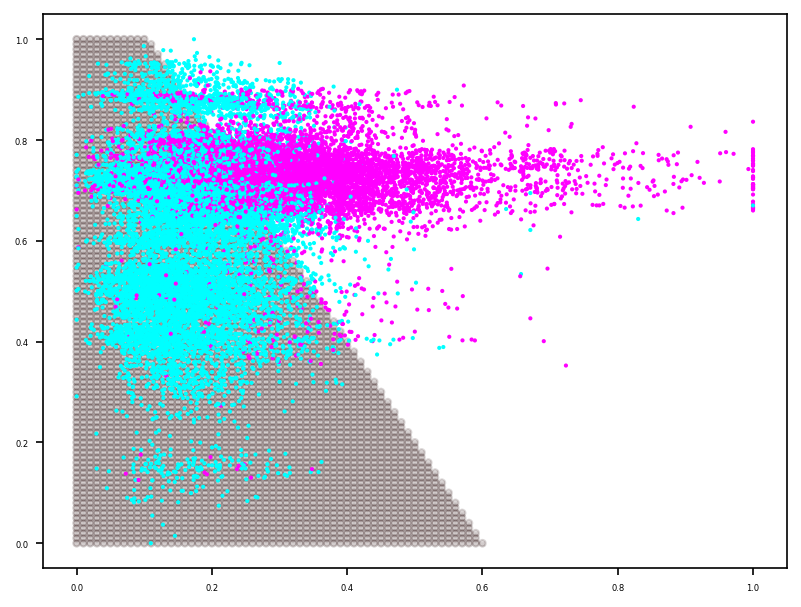

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=234, solver='liblinear', max_iter=10000, C=100)
model.fit(x_2, chouse_target)
print(model.score(x_2, chouse_target))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.2, s=10)
plt.scatter(x_2[['MedInc']], x_2[['b']], c=chouse_target.values.flatten(), cmap='cool', s=1)
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8058624031007752


C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


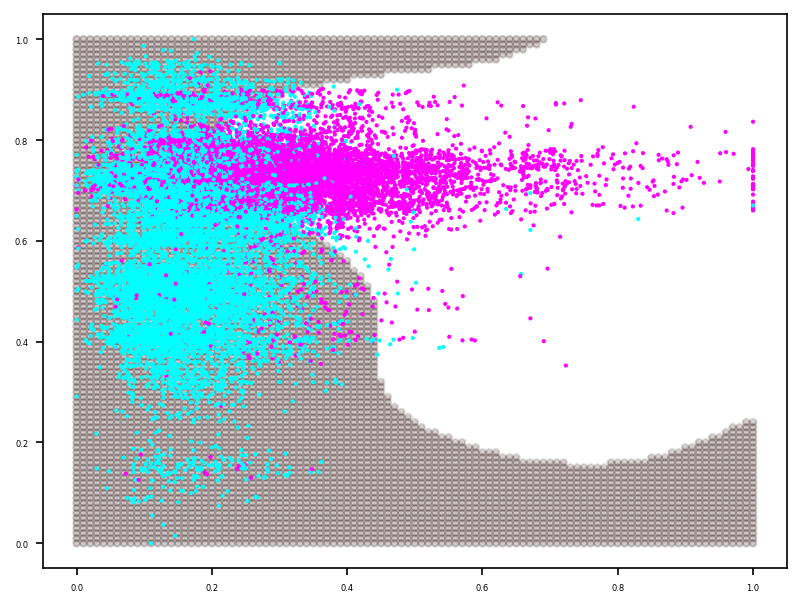

In [64]:
# 使用svm：默认参数
from sklearn.svm import SVC
model = SVC()
model.fit(x_2, chouse_target.values.flatten())
print(model.score(x_2, chouse_target.values.flatten()))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.2, s=10)
plt.scatter(x_2[['MedInc']], x_2[['b']], c=chouse_target.values.flatten(), cmap='cool', s=1)
plt.show()

0.7843992248062015


C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


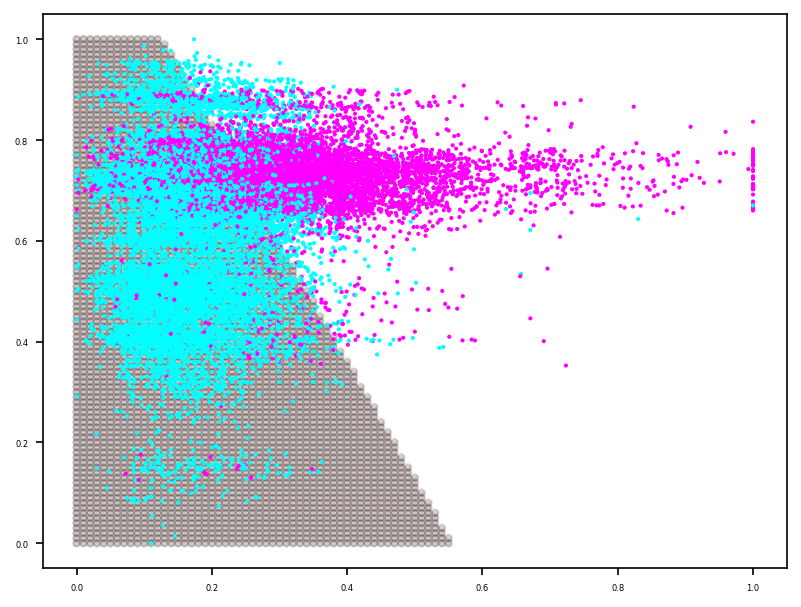

In [65]:
# 使用svm：使用linear作为核函数
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_2, chouse_target.values.flatten())
print(model.score(x_2, chouse_target.values.flatten()))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.2, s=10)
plt.scatter(x_2[['MedInc']], x_2[['b']], c=chouse_target.values.flatten(), cmap='cool', s=1)
plt.show()

0.8136143410852713


C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


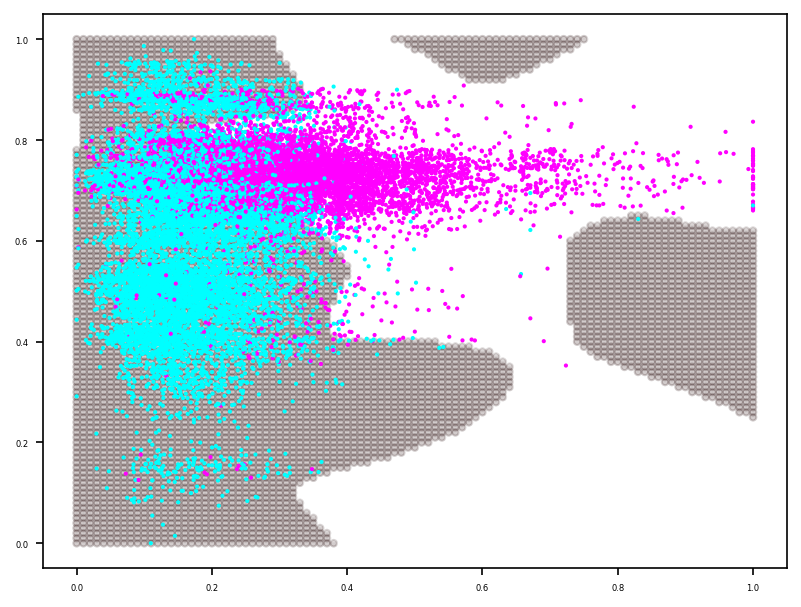

In [66]:
# 使用svm：关闭软间隔
from sklearn.svm import SVC
model = SVC(C=1000000)
model.fit(x_2, chouse_target.values.flatten())
print(model.score(x_2, chouse_target.values.flatten()))
disp_predict = model.predict(disp_input)

plt.rcParams['figure.dpi'] = 150
plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.2, s=10)
plt.scatter(x_2[['MedInc']], x_2[['b']], c=chouse_target.values.flatten(), cmap='cool', s=1)
plt.show()

In [ ]:
# 使用svm：回归
from sklearn.svm import SVR
model = SVR()
model.fit(x_2, chouse_target.values.flatten())
print(model.score(x_2, chouse_target.values.flatten()))
# disp_input需要变一位数组
# disp_predict = model.predict(disp_input)
#
# plt.rcParams['figure.dpi'] = 150
# plt.scatter(disp_input[:, 0], disp_input[:, 1], c=disp_predict, cmap='pink', alpha=0.2, s=10)
# plt.scatter(x_2[['MedInc']], x_2[['b']], c=chouse_target.values.flatten(), cmap='cool', s=1)
# plt.show()